# Fortune 1000 companies in 2022

![](https://puml.io/wp-content/uploads/2022/09/Untitled-design-20-1024x576.png)

This project aims to analyze the dataset of `Fortune 1000 companies` in `2022`. The dataset provides information about the top 1000 companies based on their revenue in the year 2022. This dataset includes various attributes such as **Company**, **Rank**, **Revenue**, and more.

The goal of this project is to gain insights into the Fortune 1000 companies and understand trends, patterns, and characteristics of these companies in 2022. To analyze the dataset, we can utilize tools and techniques such as data visualization, statistical analysis, and exploratory data analysis. We can use programming language like Python along with its libraries like `Pandas`, `NumPy`, and `Matplotlib` for data manipulation, analysis, and visualization.

## Importing Python Libraries

In [3]:
!pip install pandas --upgrade --quiet
!pip install matplotlib --upgrade --quiet
!pip install seaborn --upgrade --quiet

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

## Downloading the Dataset

> - Downloading the kaggle dataset of 2022's Fortune 1000 companies (on highest revenue basis)

In [5]:
url = "https://raw.githubusercontent.com/Shrutinagar/fortune_1000_companies/main/fortune_1000_companies_2022_dataset.csv"

In [6]:
from urllib.request import urlretrieve
urlretrieve(url, "fortune_1000_companies.csv")

('fortune_1000_companies.csv', <http.client.HTTPMessage at 0x7f3047a6dd00>)

The dataset has been downloaded and extracted.

## Data Preparation and Cleaning

> - Exploring the data, check it's shape, count of rows and columns. 
> - Cleaning the data by stripping unwanted spaces, removing unwanted columns, check datatypes and check for missing values in the dataset

### Data Preparation

In [7]:
# loading dataset into dataframe using Pandas
fortune_1000_df = pd.read_csv("fortune_1000_companies.csv")

In [9]:
print(fortune_1000_df.shape)

(1000, 11)


In [10]:
# Explore the number of rows & columns, ranges of values etc.
# number of rows in the dataset
rows = fortune_1000_df.count()[0]
print(rows)

1000


In [11]:
# number of columns in the dataset
columns = fortune_1000_df.shape[1]
print(columns)

11


In [12]:
# datatypes
fortune_1000_df.dtypes

Rank_in_2022                              int64
Name                                     object
Revenue(in millions)                      int64
Revenue(% change)                        object
Profits(in millions)                     object
Profits(% change)                        object
 Assets                                   int64
Market_Value                             object
Change in Rank of top 1000 companies    float64
Employees                                 int64
Change in Rank (500 only)               float64
dtype: object

### Clean & Transform Data

#### Rename Columns

In [13]:
fortune_1000_df.rename(columns = {'Rank_in_2022': "Rank",
                       'Name': 'Company_Name',
                       'Revenue(in millions)': 'Revenue_$M',
                       'Revenue(% change)': 'Revenue_change%',
                       'Profits(in millions)': 'Profits_$M',
                       'Profits(% change)': 'Profits_change%',
                       ' Assets': 'Assets_$M',
                       'Market_Value': 'Market_Value_$M'}, inplace=True)

In [14]:
fortune_1000_df.columns

Index(['Rank', 'Company_Name', 'Revenue_$M', 'Revenue_change%', 'Profits_$M',
       'Profits_change%', 'Assets_$M', 'Market_Value_$M',
       'Change in Rank of top 1000 companies', 'Employees',
       'Change in Rank (500 only)'],
      dtype='object')

#### Check Duplicates
`Company_Name`

In [15]:
fortune_1000_df["Company_Name"].nunique()

1000

There are no duplicate companies in the dataset

#### Drop Columns

> - There is no requirement for `rank of top 1000` and `top 500` companies for this analysis 
> - They also they have too many missing values

In [16]:
# specify columns to drop
columns_to_drop = ['Change in Rank of top 1000 companies', 'Change in Rank (500 only)']
fortune_1000_df.drop(columns = columns_to_drop, inplace=True)

In [17]:
fortune_1000_df.columns

Index(['Rank', 'Company_Name', 'Revenue_$M', 'Revenue_change%', 'Profits_$M',
       'Profits_change%', 'Assets_$M', 'Market_Value_$M', 'Employees'],
      dtype='object')

2 Columns Removed from the dataset

#### Fill Empty Cells
> - Change value of empty columns in `Revenue_change%` and `Profits_change%` to 0

In [18]:
fortune_1000_df['Revenue_change%'].isnull().sum()

8

In [19]:
fortune_1000_df['Profits_change%'].isnull().sum()

273

In [20]:
fortune_1000_df.fillna(0, inplace = True)

All the Empty cells are replaced with the value 0

#### Dataset Statistics

In [21]:
# Statistical data for numerical columns
fortune_1000_df.describe()

,Rank,Revenue_$M,Assets_$M,Employees
count,1000.000000,1000.000000,1.000000e+03,1.000000e+03
mean,500.500000,17986.829000,6.063228e+04,3.575853e+04
std,288.819436,40813.273688,2.642393e+05,1.046066e+05
min,1.000000,2107.000000,4.140000e+02,1.600000e+02
25%,250.750000,3501.000000,4.907250e+03,6.498750e+03
50%,500.500000,6375.500000,1.173400e+04,1.352750e+04
75%,750.250000,14615.500000,3.223900e+04,2.885000e+04
max,1000.000000,572754.000000,4.229166e+06,2.300000e+06


Few more columns from the dataset are suppsosed to be integer or float but their Dtype is object

Therefore the above Statistical data is incomplete

#### Convert Datatypes

> `Profits_$M`

Because there is a string `-` in the column's data, I have to change the value to zero for applying `astype(int)` 

In [22]:
# Replace non-numeric values in the "Profits_$M" column with 0
fortune_1000_df["Profits_$M"] = fortune_1000_df['Profits_$M'].replace(' - ', 0)

In [23]:
# Convert the "Employees" column to integers
fortune_1000_df['Profits_$M'] = fortune_1000_df['Profits_$M'].astype(int)

> `Market_Value`
- Converting `Market_Value_$M` column to int64 gives out error due to decimal values
- And the `int()` function can only convert whole numbers, not decimal numbers.

To solve this error, I will use the `astype(float)` function instead of `astype(int)`. This will convert the column to float data type, which can handle decimal values.


In [24]:
fortune_1000_df["Market_Value_$M"] = fortune_1000_df["Market_Value_$M"].replace(" - ", 0).astype(float)

##### Percetage Columns
> `Revenue_change%` & `Profits_change%`

**Steps:** 
1. Remove the percentage symbol '%' from the values in the column

In [25]:
fortune_1000_df["Revenue_change%"] = fortune_1000_df['Revenue_change%'].str.replace('%', '')
fortune_1000_df["Profits_change%"] = fortune_1000_df['Profits_change%'].str.replace('%', '')

In [26]:
fortune_1000_df.fillna(0, inplace = True)

In [27]:
fortune_1000_df.sample()

,Rank,Company_Name,Revenue_$M,Revenue_change%,Profits_$M,Profits_change%,Assets_$M,Market_Value_$M,Employees
255,256,Principal Financial,14263,-3.20,1711,22.60,304657,19176.7,18600


2. Change datatype to a float

In [28]:
fortune_1000_df['Revenue_change%'] = fortune_1000_df['Revenue_change%'].astype(float)
fortune_1000_df['Profits_change%'] = fortune_1000_df['Profits_change%'].astype(float)

Some of the column's statistical data is represented through scientific notation
- To correct that we can use:

In [29]:
pd.options.display.float_format = '{:.0f}'.format

In [30]:
fortune_1000_df.sample()

,Rank,Company_Name,Revenue_$M,Revenue_change%,Profits_$M,Profits_change%,Assets_$M,Market_Value_$M,Employees
280,281,Discover Financial Services,13221,2,5449,378,110242,31077,16700


In [31]:
fortune_1000_df.describe()

,Rank,Revenue_$M,Revenue_change%,Profits_$M,Profits_change%,Assets_$M,Market_Value_$M,Employees
count,1000,1000,1000,1000,1000,1000,1000,1000
mean,500,17987,30,2020,59,60632,44803,35759
std,289,40813,99,6413,6093,264239,160080,104607
min,1,2107,-74,-6520,-177496,414,0,160
25%,251,3501,6,192,0,4907,4378,6499
50%,500,6376,16,570,17,11734,11774,13528
75%,750,14616,31,1490,78,32239,34069,28850
max,1000,572754,2199,94680,49979,4229166,2849538,2300000


The `fortune_1000_df` is Prepared and Cleaned

### Merge Datasets
> - The additional dataset contains Company Type - Private / Public
> - Merge new dataset with cleaned `fortune_1000_df` dataset 

In [32]:
url_2 = "https://github.com/Shrutinagar/fortune_1000_companies/raw/main/company_type.csv"
urlretrieve(url_2, "company_type.csv")

('company_type.csv', <http.client.HTTPMessage at 0x7f3047964760>)

In [33]:
# read the retrieved csv file
type_df = pd.read_csv("company_type.csv")

In [34]:
type_df.head(2)

,Company_Name,Type
0,Walmart,Public
1,Amazon,Public


In [35]:
merged_df = fortune_1000_df.merge(type_df, on = "Company_Name")
merged_df.head()

,Rank,Company_Name,Revenue_$M,Revenue_change%,Profits_$M,Profits_change%,Assets_$M,Market_Value_$M,Employees,Type
0,1,Walmart,572754,2,13673,1,244860,409795,2300000,Public
1,2,Amazon,469822,22,33364,56,420549,1658807,1608000,Public
2,3,Apple,365817,33,94680,65,351002,2849538,154000,Public
3,4,CVS Health,292111,9,7910,10,232999,132839,258000,Public
4,5,UnitedHealth Group,287597,12,17285,12,212206,479830,350000,Public


#### Merging Industry_Type dataset
>- Merge `fortune_1000_df` and `industry_type_df`

In [36]:
url_3 = "https://github.com/Shrutinagar/fortune_1000_companies/raw/main/Industry_type.csv"
urlretrieve(url_3, "Industry_Type.csv")
Industry_Type = pd.read_csv("Industry_Type.csv")

In [37]:
merged_industry_df = fortune_1000_df.merge(Industry_Type, on = "Company_Name")
merged_industry_df.head()

,Rank,Company_Name,Revenue_$M,Revenue_change%,Profits_$M,Profits_change%,Assets_$M,Market_Value_$M,Employees,Industry_Type
0,1,Walmart,572754,2,13673,1,244860,409795,2300000,Retail
1,2,Amazon,469822,22,33364,56,420549,1658807,1608000,Retail
2,3,Apple,365817,33,94680,65,351002,2849538,154000,Technology
3,4,CVS Health,292111,9,7910,10,232999,132839,258000,Healthcare
4,5,UnitedHealth Group,287597,12,17285,12,212206,479830,350000,Healthcare


### Duplicate Dataset for further analysis

In [38]:
fortune_1000_df2 = fortune_1000_df.copy()

### Saving Cleaned Dataset
to a new CSV file

In [39]:
fortune_1000_df.to_csv("cleaned_dataset.csv", index = False)

## Exploratory Analysis and Visualization

> - Compute the mean, sum, range and other interesting statistics for numeric columns
> - Distributions of numeric columns using heatmap.
> - Relationship between columns using scatter plots, barplots etc.
> - Note of interesting insights from the exploratory analysis

The python libraries required for Visualization are `Matplotlib` and `Seaborn`

#### Default Styling

> `rcParams` : It's a dictionary of most **matplotlib styling** that we can set at the start it will be applied to all the plots.

In [42]:
sns.set_style('white')
mpl.rcParams['font.size'] = 10
mpl.rcParams['figure.figsize'] = (10, 7)
mpl.rcParams['figure.facecolor'] = '#00000000'

### Correlation Between Revenue and Profit

>- Revenue v/s Profit - scatterplot
>- hue - Company_Name

Correlation: Revenue v/s Profit


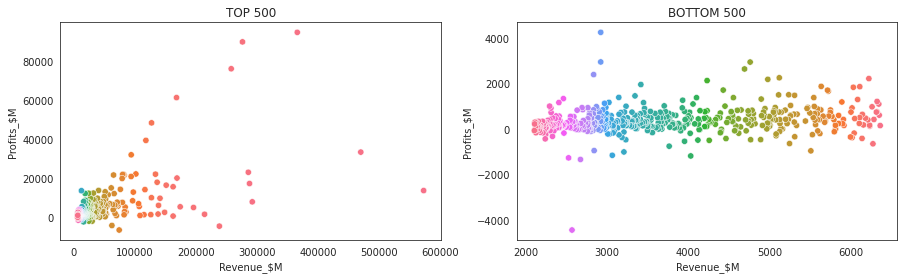

In [43]:
fig, axes = plt.subplots(1,2, figsize = (15,4))
print("Correlation: Revenue v/s Profit")
axes[0].set_title("TOP 500")
sns.scatterplot(x = "Revenue_$M", y = "Profits_$M", hue = "Company_Name", data = fortune_1000_df2.head(500),
               legend= None, s = 40, ax = axes[0]);

axes[1].set_title("BOTTOM 500")
sns.scatterplot(x = "Revenue_$M", y = "Profits_$M", hue = "Company_Name", data = fortune_1000_df2.tail(500),
               legend= None, s = 40, ax = axes[1]);

> The above analysis shows that

**TOP 500 Companies**: Most Companies has `positive correlation` between Revenue and Profit in year 2022

**BOTTOM 500 Companies**: Over 70% company's profits lie between -1000 and 1500 Million $

### Top 10 Companies Analysis

> Creating a subplot which will include

Top 10 companies by Highest Revenue, Profits, Assets, Market_Value and Employees

In [44]:
profit = fortune_1000_df2.nlargest(10, "Profits_$M")
revenue = fortune_1000_df2.nlargest(10, "Revenue_$M")
asset = fortune_1000_df2.nlargest(10, "Assets_$M")
market_value = fortune_1000_df2.nlargest(10, "Market_Value_$M")
employees = fortune_1000_df2.nlargest(10, "Employees")

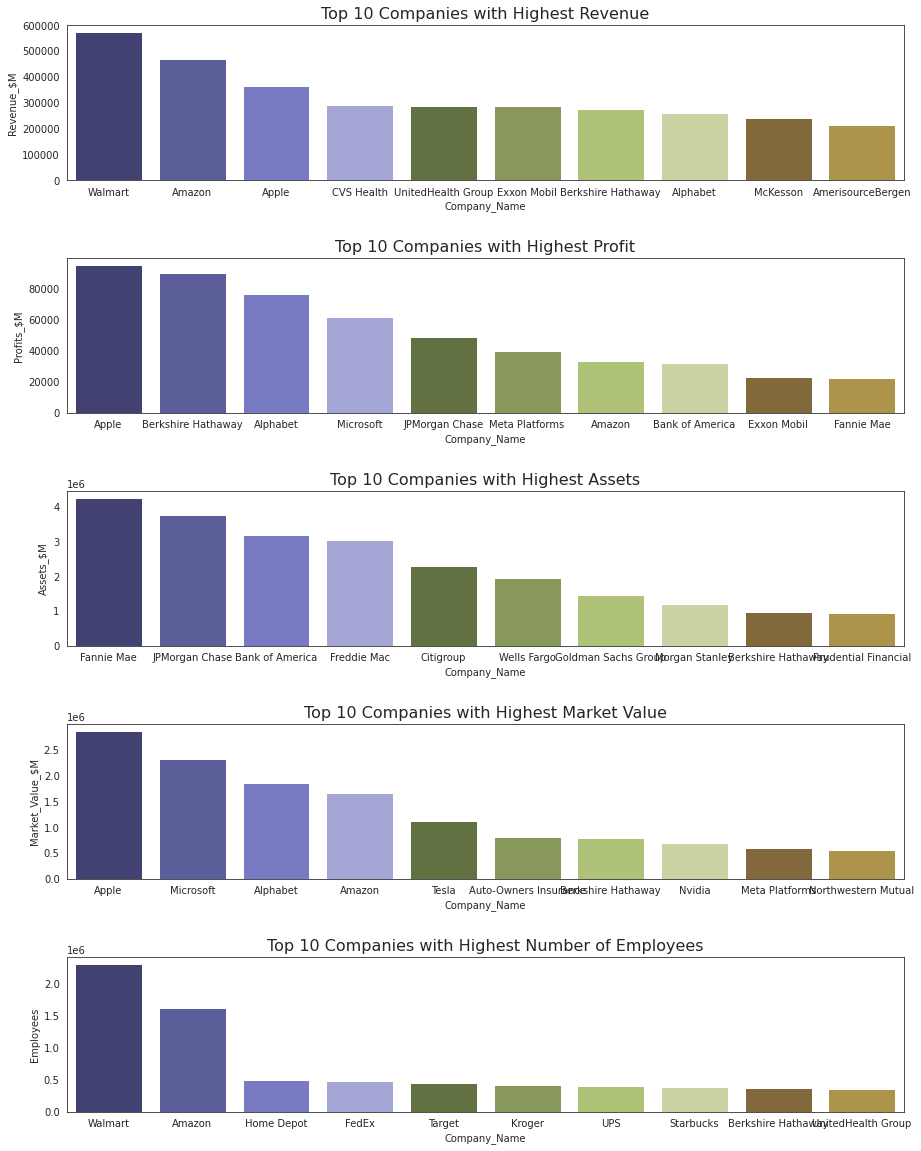

In [45]:
fig, axes = plt.subplots(5,1, figsize = (15,20))

# Revenue
axes[0].set_title("Top 10 Companies with Highest Revenue", fontsize = 16)
sns.barplot(x = 'Company_Name', 
            y = 'Revenue_$M', 
            data = revenue,
            palette = "tab20b",
            ax = axes[0]);
# Profits
axes[1].set_title("Top 10 Companies with Highest Profit", fontsize = 16)
sns.barplot(x = 'Company_Name', 
            y = 'Profits_$M', 
            data = profit,
            palette = "tab20b",
            ax = axes[1]);
# Assets
axes[2].set_title("Top 10 Companies with Highest Assets", fontsize = 16)
sns.barplot(x = 'Company_Name', 
            y = 'Assets_$M', 
            data = asset, 
            palette = "tab20b",
            ax = axes[2]);
# Market Value
axes[3].set_title("Top 10 Companies with Highest Market Value", fontsize = 16)
sns.barplot(x = 'Company_Name', 
            y = 'Market_Value_$M', 
            data = market_value, 
            palette = "tab20b",
            ax = axes[3]);
# Employees
axes[4].set_title("Top 10 Companies with Highest Number of Employees", fontsize = 16)
sns.barplot(x = 'Company_Name', 
            y = 'Employees', 
            data = employees,
            palette = "tab20b",
            ax = axes[4]);

plt.subplots_adjust(hspace=0.5)

> The above analysis shows that :
- `Birkshire Hathaway` has been at the top in all the criterias for the year 2022
- `Amazon` - Revenue, Profit, Market Value and also has over 1.5 million Employees
- `Walmart` has Maximum Revenue and over 2 million Employees

- Total Revenue by TOP 10 Companies

In [46]:
Total_Revenue = revenue["Revenue_$M"].sum()/1000
print("Total Revenue: {} Billion $".format(Total_Revenue))

Total Revenue: 3259.689 Billion $


- Average Profit by TOP 10 Companies

In [47]:
Avg_Profit = profit["Profits_$M"].sum()/(10*1000)
print("Average Profit: {} Billion $".format(int(Avg_Profit)))

Average Profit: 52 Billion $


### Pie Chart - Sector

> Using `groupby` to count number of companies in each category

In [48]:
sector = merged_df.groupby("Type")[["Company_Name"]].count()

In [49]:
sector

,Company_Name
Type,
Private,45
Public,955


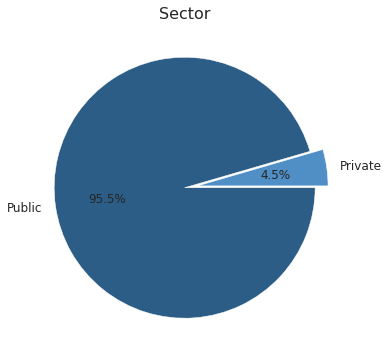

In [50]:
plt.figure(figsize = (6,6))
plt.title("Sector", fontsize = 16)
plt.pie(sector.Company_Name,
       labels = sector.index,
       autopct = '%.1f%%',
       wedgeprops = {'linewidth': 0.5, 'edgecolor': 'white'},
       textprops={'size': 'large'},
       colors = ["#4f8fc6", "#2b5d87"],
       explode=(0.1,0));


> The above analysis shows that:

The analysis allows to determine `Public Sector` dominates the Fortune 1000 list

In the year 2022 only 45 or 4.5% of total companies made to Fortune 1000

### Heatmap

> Identifying private sector Company's profits using Heatmap

In [51]:
private_sector_df = merged_df[merged_df["Type"]=="Private"]

In [52]:
private_df = private_sector_df[["Company_Name", "Profits_$M"]].set_index("Company_Name")
private_df

,Profits_$M
Company_Name,
New York Life Insurance,277
Publix Super Markets,4412
Liberty Mutual Insurance Group,3068
Nationwide,1617
TIAA,4061
USAA,3300
Northwestern Mutual,978
Massachusetts Mutual Life Insurance,319
HF Sinclair,558


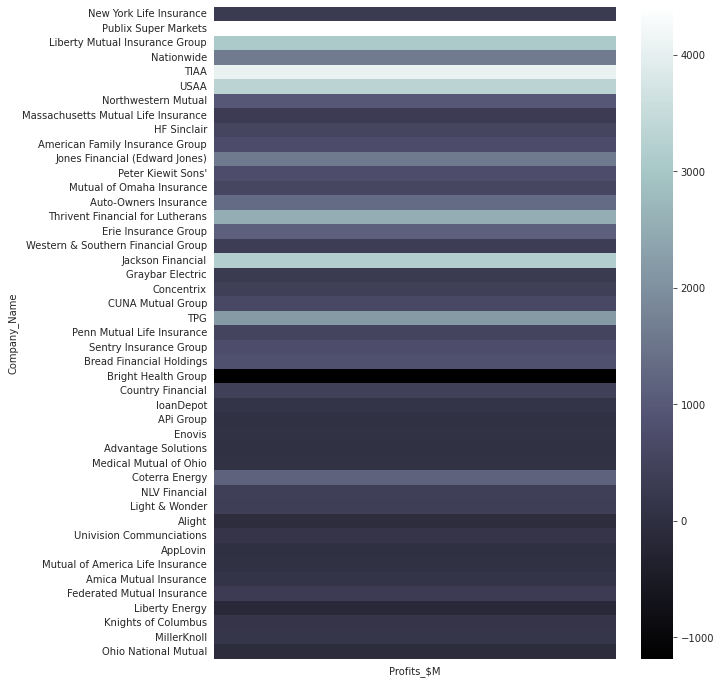

In [53]:
plt.figure(figsize = (9,12))
sns.heatmap(private_df, cmap = "bone");

> The above analysis shows that :

Bright Health Group** has gone into loss of over 1000 million $.

Publix Super Markets** has highest profit of over 4000 million $.

## Asking and Answering Questions

> - Computing the results using Pandas or by plotting graphs using Matplotlib/Seaborn
> - Creating New columns, merging dataset(Sector type & Industry type), Grouping/Aggregation etc
> - Dipicting relation between various factors like : Profit/Revenue, Assets/Market_Value, etc.
> - Defining python libraries

### Python Libraries

> Pandas

Pandas is Python library, it is used to work with big datasets. It has functions for analyzing, cleaning, exploring, and manipulating data. Pandas has various in_built functions like : df.sort_values, df.loc, df.duplicated, pd.to_datetime, df.corr,pd.read_csv , etc.

> Matplotlib

Matplotlib is a 2-D graph plotting library in Python, we can can create various visualizations using matplotlib like : .hist for histogram, .pie for piechart, .plot for line chart, .bar for bar chart

> Seaborn

Seaborn is a library that uses Matplotlib underneath to plot graphs. It can be used to visualize random distributions.
Some examples of plots are like : sns.barplot, sns.heatmap, sns.scatterplot

### QUES 1
> Find the Company that made the highest profit in 2022

In [56]:
max_profit = fortune_1000_df2["Profits_$M"].max()
max_profit

94680

In [57]:
company = fortune_1000_df2[fortune_1000_df2["Profits_$M"] == max_profit]["Company_Name"].values[0]
print(company)

Apple


In [58]:
print("Company that made highest profit of {} Billion $ in the Year 2022 is : {}".format(max_profit/1000, company))

Company that made highest profit of 94.68 Billion $ in the Year 2022 is : Apple


### QUES 2
> Is there a correlation between the rank of a company in the list and its revenue?

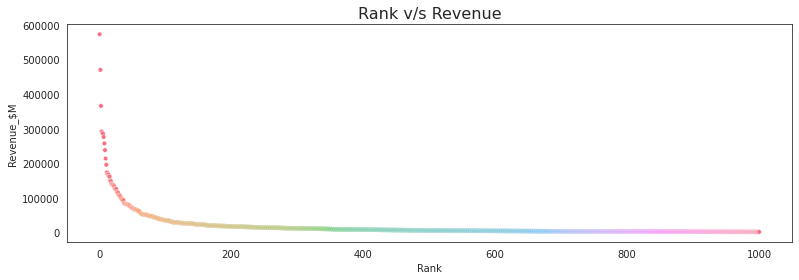

In [59]:
plt.figure(figsize = (13,4))
plt.title("Rank v/s Revenue", fontsize = 16)
sns.scatterplot(x = "Rank",
               y = "Revenue_$M",
               hue = "Company_Name",
               data = fortune_1000_df2,
               legend = None,
               s = 20);

There is a `Negative Correlation` between Rank and Revenue

With Increasing Rank there is a Decrease in Revenue

### QUES 3
> Show the trend between `Revenue_change%` and `Profits_change%` for Fortune 500 companies

In [60]:
Fortune_500 = fortune_1000_df2.head(500)

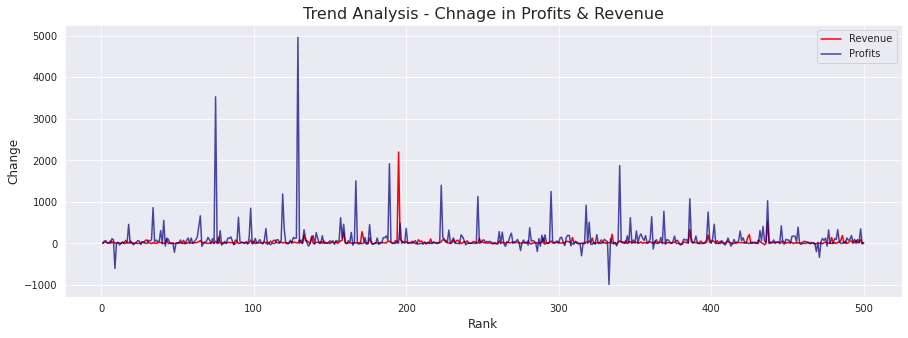

In [61]:
sns.set_style("darkgrid")
plt.figure(figsize = (15,5))
plt.title("Trend Analysis - Chnage in Profits & Revenue", fontsize = 16)
plt.xlabel("Rank", fontsize = 12)
plt.ylabel("Change", fontsize = 12)
plt.plot(Fortune_500.Rank, Fortune_500["Revenue_change%"], c = "red")
plt.plot(Fortune_500.Rank, Fortune_500["Profits_change%"], c = "navy", alpha = 0.7)
plt.legend(["Revenue", "Profits"]);

### QUES 4
> Find 5 Industries in Fortune 1000 list made maximum Profit and maximum Loss?

In [62]:
profits_df = merged_industry_df.groupby("Industry_Type")[["Profits_$M"]].sum().sort_values("Profits_$M", ascending = False)
profit_df = profits_df.head(5)
loss_df = profits_df.tail(5)

In [63]:
print("Industries with Maximum Profit: ")
profit_df

Industries with Maximum Profit: 


,Profits_$M
Industry_Type,
Technology,389780
Financial Services,380233
Retail,150838
Energy,118659
Pharmaceutical,97054


In [64]:
print("Industries with Maximum Loss: ")
loss_df

Industries with Maximum Loss: 


,Profits_$M
Industry_Type,
Network Security,-499
Animal Health,-526
Casino,-961
Airline,-3061
Industrial,-3811


### QUES 5
> Find Highest Market Value as well as Highest Assets in year 2022

In [65]:
df = fortune_1000_df2.sort_values(["Market_Value_$M", "Assets_$M"], axis = 0, ascending = False).head(10)

In [66]:
df_2 = df[["Rank", "Company_Name", "Market_Value_$M", "Assets_$M"]].set_index("Rank")
df_2

,Company_Name,Market_Value_$M,Assets_$M
Rank,,,
3,Apple,2849538,351002
14,Microsoft,2311359,333779
8,Alphabet,1842326,359268
2,Amazon,1658807,420549
65,Tesla,1113708,62131
339,Auto-Owners Insurance,817000,32487
7,Berkshire Hathaway,779542,958784
134,Nvidia,684879,44187
27,Meta Platforms,605251,165987


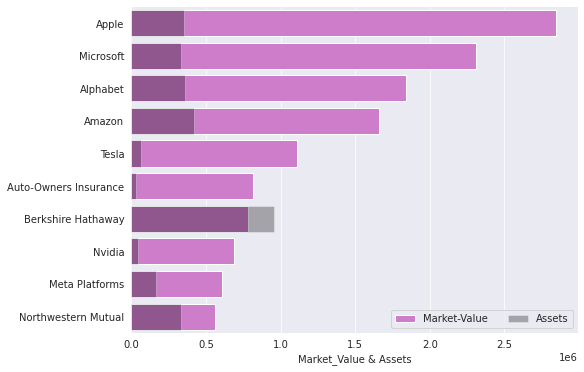

In [67]:
f, ax = plt.subplots(figsize = (8,6))

# Market value
sns.barplot(x = "Market_Value_$M", y = "Company_Name", data = df_2,
           label = "Market-Value", color = "orchid")

# Assets
sns.barplot(x = "Assets_$M", y = "Company_Name", data = df_2,
           label = "Assets", color = "k", alpha = 0.3)

# Legend
ax.legend(ncol = 2, loc = "lower right", frameon = True)
ax.set(ylabel = "", xlabel = "Market_Value & Assets")
# to remove border
sns.despine(left = True, bottom = True);

## Inferences and Conclusion

The provided dataset contains information about the Fortune 1000 companies for the year 2022. 

`Inferences`:

> `Industry Distribution:` The dataset includes companies from various industries, such as Technology, Financial Services, Retail, Energy, Healthcare, etc. The Technology sector has the highest representation, followed by Financial Services and Retail.

> `Revenue Distribution:` The dataset provides revenue data for each company. The revenue ranges from billions to trillions of dollars. The majority of companies fall in the revenue range of $10 billion to $100 billion.

> `Employee Distribution:` The dataset also includes information about the number of employees in each company. The employee count varies from thousands to hundreds of thousands. Most companies have an employee count between 10,000 and 100,000.

> `Top Companies by Revenue:` By analyzing the revenue column, it is possible to identify the top companies in terms of revenue. These companies are likely to be the largest and most successful in the Fortune 1000 list.

> `Sector Dominance:` The dataset allows us to determine which sector dominates the Fortune 1000 list. By analyzing the number of companies in each industry, it is possible to identify the sector with the highest representation is Public Sector with majority of 95%.

Based on these inferences, some `conclusions` can be drawn:

> The technology sector continues to dominate the Fortune 1000 list, indicating the significance of technology companies in the current business landscape.

> Revenue and employee count are important factors in determining a company's position in the Fortune 1000 list. Companies with higher revenue and a larger workforce are more likely to be included in the list.

> The Fortune 1000 list includes companies from various industries, highlighting the diversity of the business landscape and the importance of different sectors in the global economy.

> The dataset provides valuable insights into the financial performance and size of the largest companies in the world.

In conclusion, the analysis of the dataset provides insights into the industry distribution, revenue, employee count, and top companies in the Fortune 1000 list for 2022. These insights can be used to understand the composition and dynamics of the global businesses.

## References and Future Work

>Future Work / Projects
1. Hotel Recommendation System
2. Financial Budget Analysis